In [1]:
import pandas as pd
from pathlib import Path
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv
import requests
import json
from datetime import datetime

import seaborn as sns
%matplotlib inline

file_path2 = Path("folder/subfolder/df_Merged.csv")
df_merged = pd.read_csv(file_path2, index_col="DATE")


file_path = Path("folder/subfolder/Percentage_change.csv")
df_percentchange = pd.read_csv(file_path, index_col="DATE")

file_path3 = Path("folder/subfolder/mcsimulation.csv")
mcsimulation = pd.read_csv(file_path3)


In [2]:
def currency_1():
    
    Percentage_change= df_percentchange.plot(title="Cryptocurrencies Percent Change Since 05/10/19", figsize=(18, 15))
 
    return Percentage_change

In [3]:
def currency_2():
    
    Percentage_change_Correlation=df_percentchange.plot(kind='scatter', x='ETH', y='BTC', title="Percent Change Correlation - BTC vs. ETH")
    
    return Percentage_change_Correlation

In [4]:
def currency_3():
    
    Eth_Btc_PriceChange = df_merged.plot(kind='scatter', x='ETH', y='BTC', title="Price Change Correlation - BTC vs ETH")

    return Eth_Btc_PriceChange 

In [5]:
#def currency_5():

#    heat_map = sns.heatmap(correlation, vmin=-1, vmax=1)
    
#    return heat_map

In [6]:
def currency_6():
    
    prices = df_merged.plot.area(figsize = (12,12), subplots=True, title="Crypto Prices")

    return prices

In [7]:
def currency_7():
    
    # Plot a rolling 7-day mean of Crypto's closing prices
    seven_daymean = df_merged.rolling(window=7).mean().plot(figsize = (12,12), subplots=True)

    return seven_daymean

In [8]:
def currency_8():
    
    # Plot a rolling 7-day std dev of Crypto's closing prices
    seven_day_Deviation = df_merged.rolling(window=7).std().plot(figsize = (12,12), subplots=True)

    return seven_day_Deviation

In [9]:
def currency_9():
    
    # Plot a rolling 30-day mean of Crypto's closing prices
    Thirty_mean_Closing =df_merged.rolling(window=30).mean().plot(figsize = (12,12), subplots=True)

    return Thirty_mean_Closing

In [10]:
def currency_10():
    
    # Plot a rolling 30-day std dev of Crypto's closing prices
    Thirty_STD_Closing = df_merged.rolling(window=30).std().plot(figsize = (12,12), subplots=True)

    return Thirty_STD_Closing

In [11]:
def currency_11():
    
    # Plot a rolling 180-day mean of Crypto's closing prices
    Three_Month_mean= df_merged.rolling(window=180).mean().plot(figsize = (12,12), subplots=True)

    return Three_Month_mean

In [12]:
def currency_12():
    
    # Plot a rolling 180-day std dev of Crypto's closing prices
    Three_Month_STD= df_merged.rolling(window=180).std().plot(figsize = (12,12), subplots=True)

    return Three_Month_STD

In [13]:
def currency_18():
    
    McSim = mcsimulation.plot(legend=False, figsize=(15,15))
    
    return McSim

In [14]:
def currency_19():
    ax = mcsimulation.plot.hist( figsize=(10, 8), legend=False)
    
    return ax

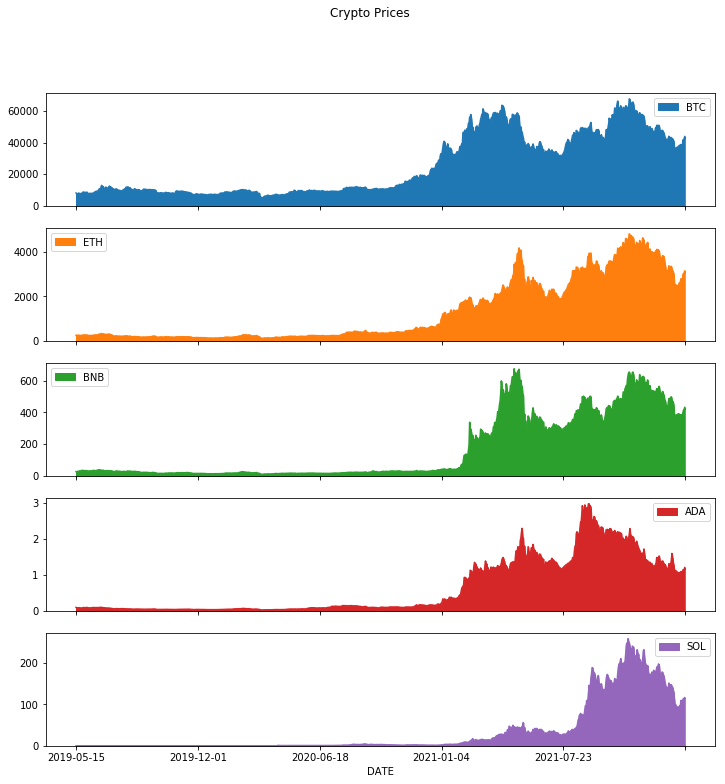

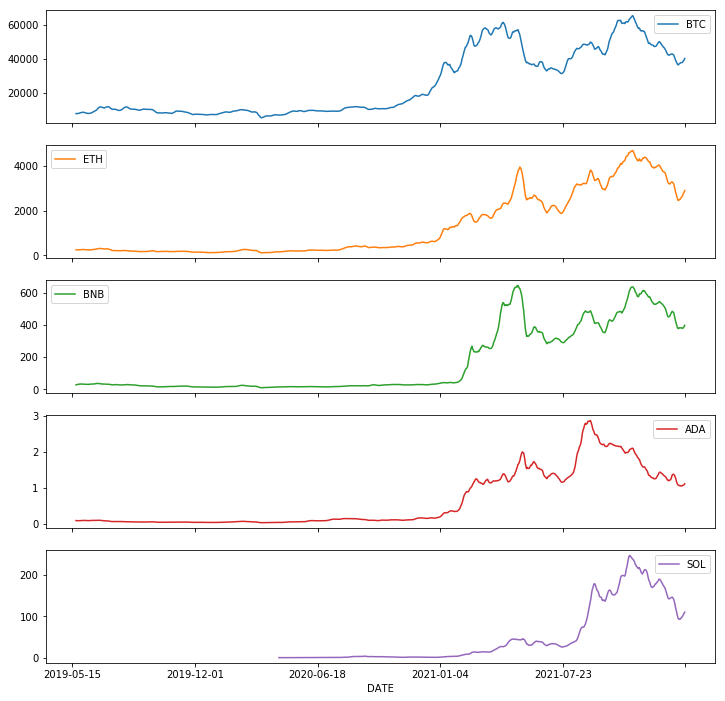

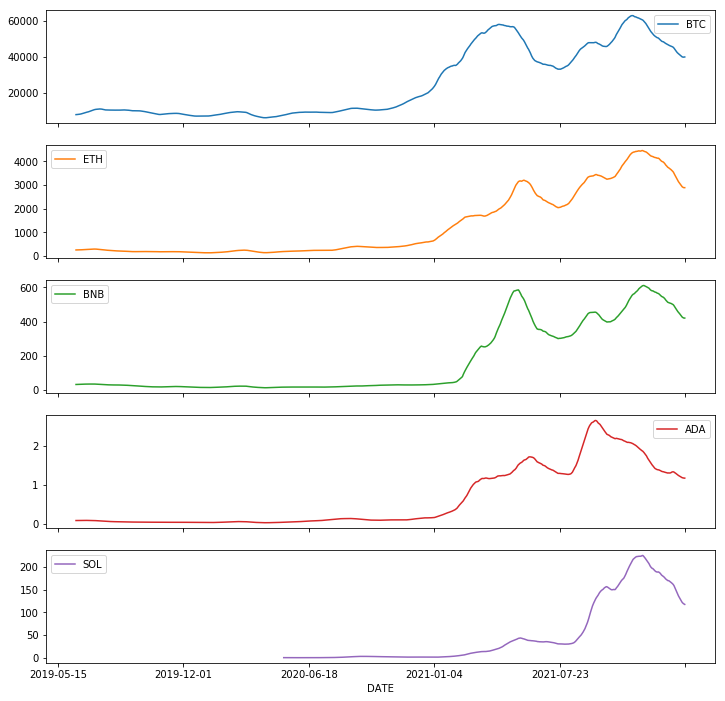

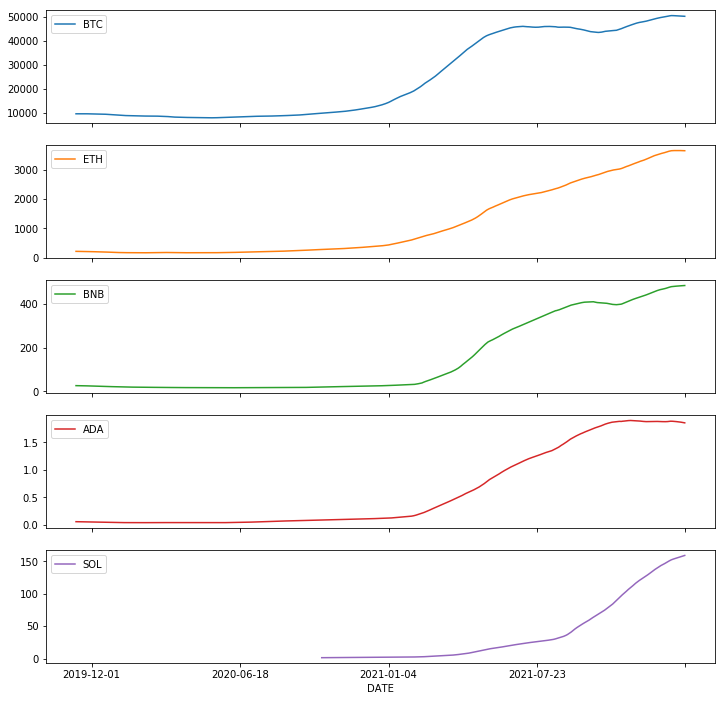

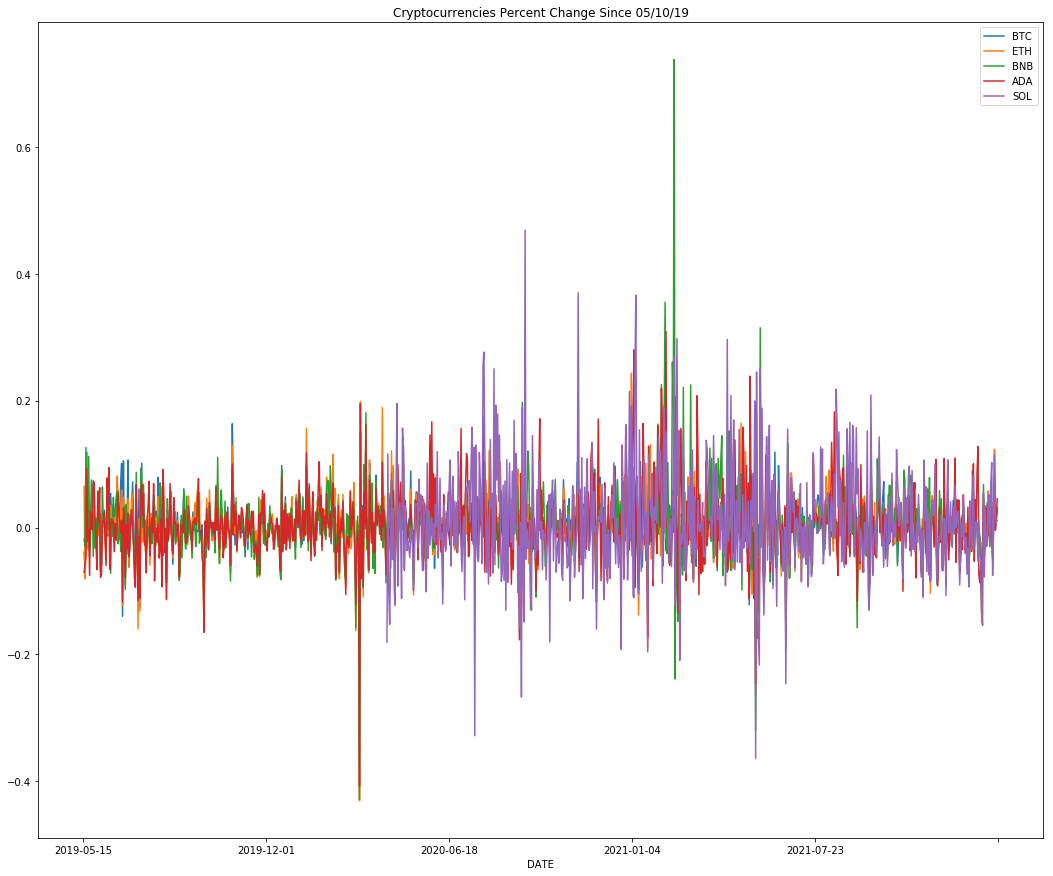

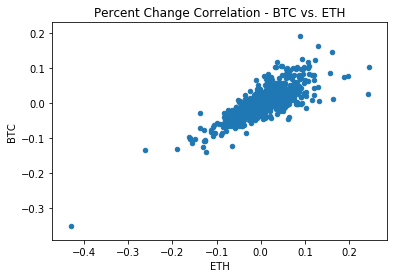

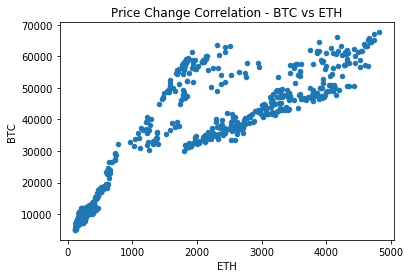

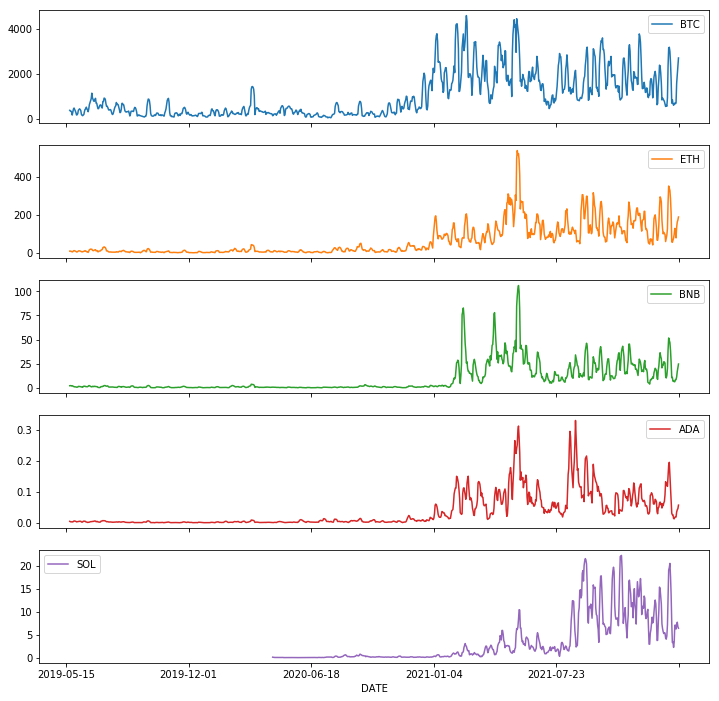

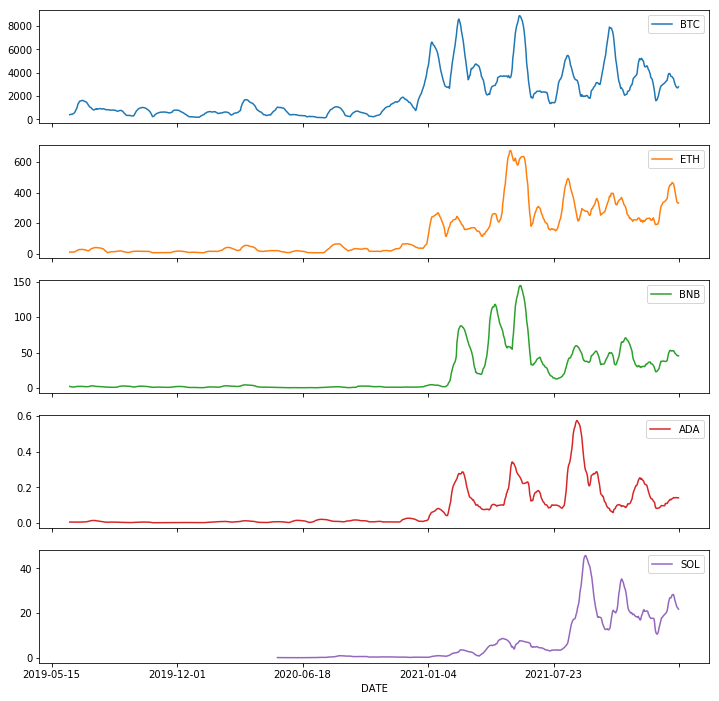

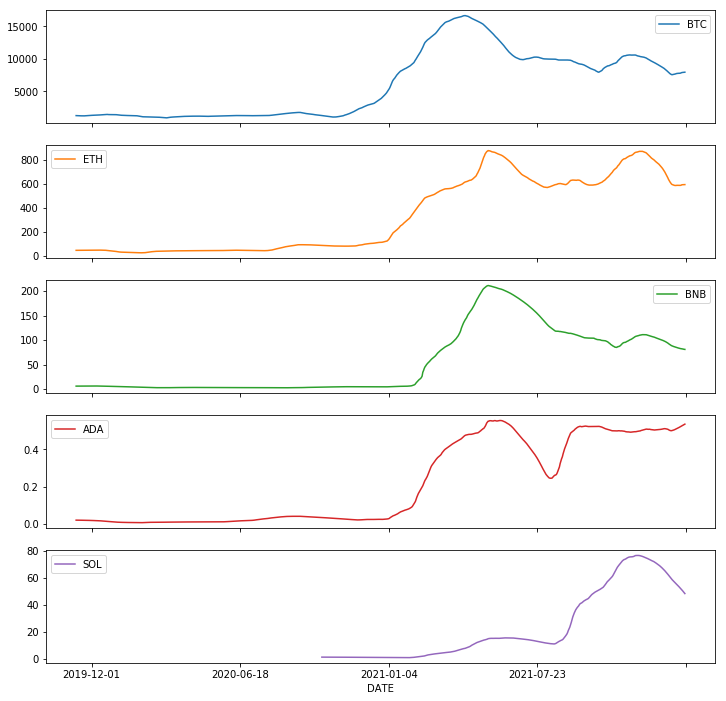

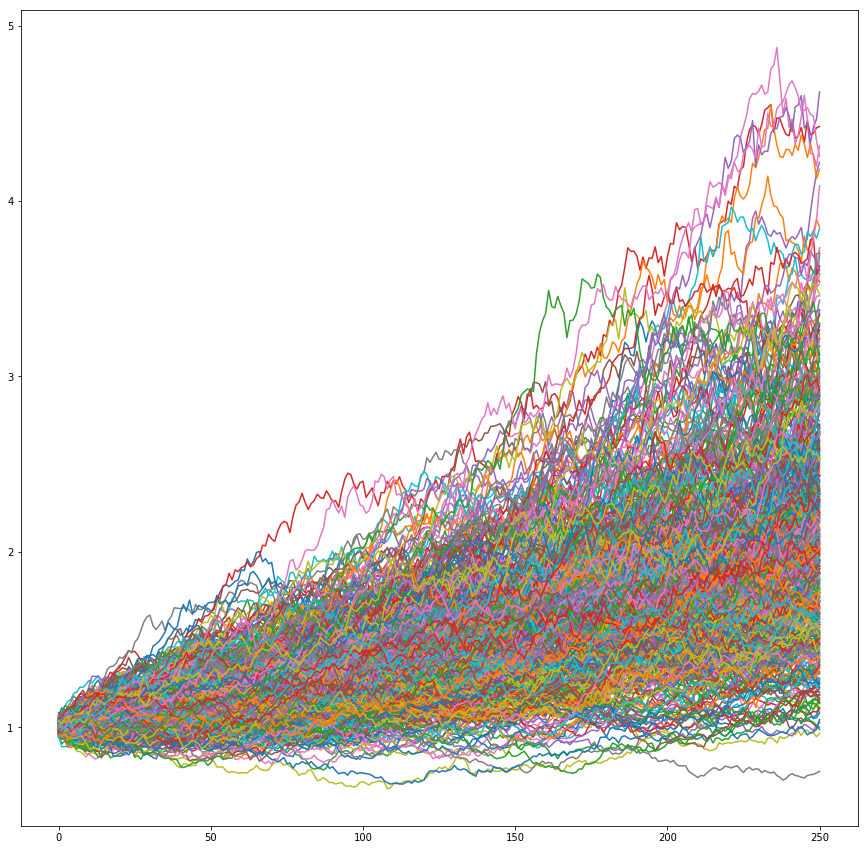

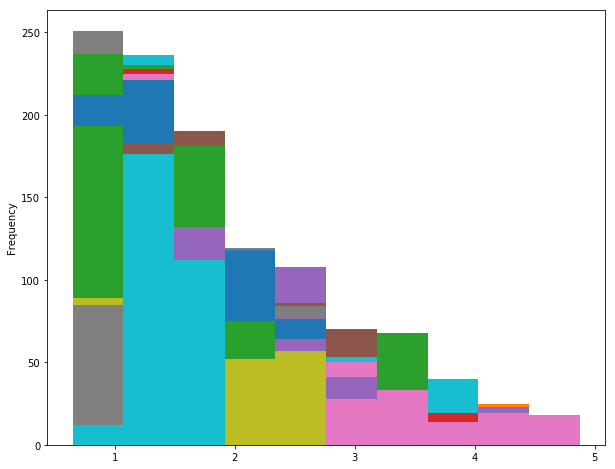

In [17]:
# Create a Title for the Dashboard

dashboard_title = "Cryptocurrency Portfolio Analysis"

Info = pn.pane.Markdown(
""""
    
    Info ,
    1- Historical Price Action,
    2- Deviation,
    3- Futures and Forecasts,
    4- Closing
   """
)


tab_1 = pn.Column(
    ("#Closing Prices over numerous time periods"),
    ("#Including Moving Averages"),
    currency_6(),
    currency_7(),
    currency_9(),
    currency_11()
)

tab_2 = pn.Column(
    #("#Deviation and Correlation"),
    currency_1(),
    currency_2(),
    currency_3(),
    #currency_5(),
    currency_8(),
    currency_10(),
    currency_12()
    
)


tab_3 = pn.Column(
    ("#Statistical Possibilities"),
    currency_18(),
    currency_19()
)

tab_4 = pn.Column(
    ("#About")
)

    
# Create the dashboard

panel = pn.Tabs(
        ("Intro",Info),
        ("Historical Price Action", tab_1),
        ("Deviation", tab_2),
        ("Futures and Forecasts", tab_3),
        ("About", tab_4)    
)

In [18]:
# Serve the# dashboard
print(dashboard_title)
panel.servable()

Cryptocurrency Portfolio Analysis


Tabs
    [0] Markdown(str)
    [1] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Str(ndarray)
        [3] Str(ndarray)
        [4] Str(ndarray)
        [5] Str(ndarray)
    [2] Column
        [0] Str(AxesSubplot)
        [1] Str(AxesSubplot)
        [2] Str(AxesSubplot)
        [3] Str(ndarray)
        [4] Str(ndarray)
        [5] Str(ndarray)
    [3] Column
        [0] Markdown(str)
        [1] Str(AxesSubplot)
        [2] Str(AxesSubplot)
    [4] Column
        [0] Markdown(str)